<a href="https://colab.research.google.com/github/harrizazham98/DataScienceProj/blob/main/004_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data analysis and wrangling
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/CDLE2.0/data/house_prediction/train.csv")
test = pd.read_csv("/content/drive/MyDrive/CDLE2.0/data/house_prediction/test.csv")

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.shape

(1460, 81)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
len(train.isnull().sum())

81

In [ ]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
train.isnull().sum()[3]

259

In [ ]:
len(train.isnull().sum())

81

In [ ]:
train.columns[0]

'Id'

In [ ]:
#analyze the number of columns which carry the null and non-null values
count=0
null_list = []
for index,i in enumerate(train.isnull().sum()):
  if i ==0:
    count+=1
  else:
    null_list.append(train.columns[index])
    continue

print("The data has " + str(count)  + " columns which carry no null values")
null_var = 81-count
print("It has " + str(null_var)+ " which carry null values")

The data has 62 columns which carry no null values
It has 19 which carry null values


In [ ]:
print(null_list)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [ ]:
len(null_list)

19

In [ ]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
train.isnull().count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train.describe().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
print("It has " + str(len(train.describe().columns))+ " numerical columns")

It has 38 numerical columns


In [ ]:
#analyze the categorical parts
train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [ ]:
print("It has " + str(len(train.describe(include=['O']).columns))+ " numerical columns")

It has 43 numerical columns


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12a723d550>,
      dtype=object)

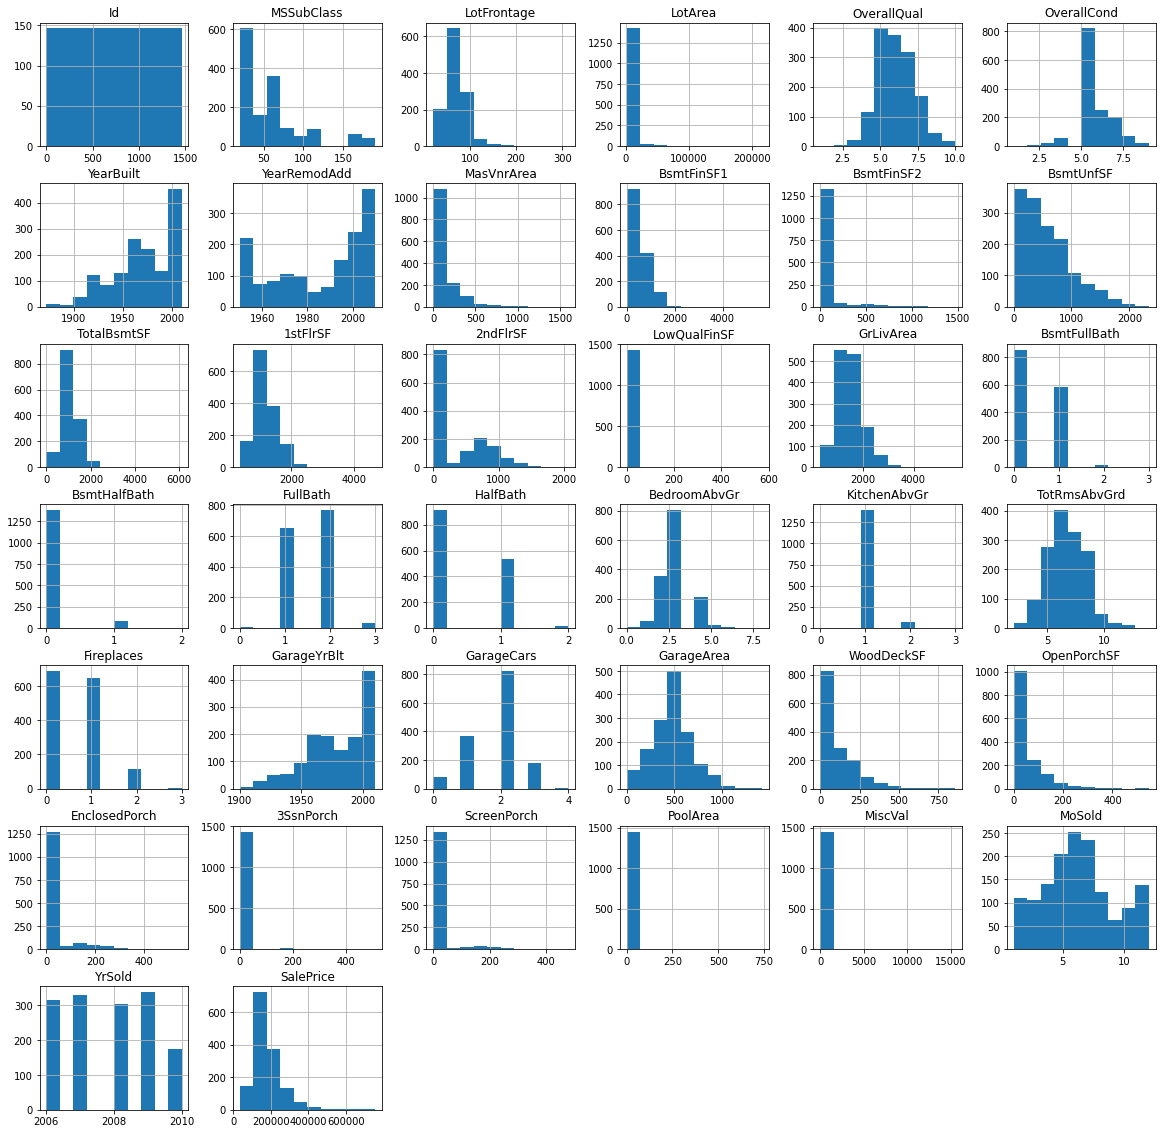

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(20,20))
train.hist(ax=fig.gca())

Text(0.5, 1.0, 'Correlation')

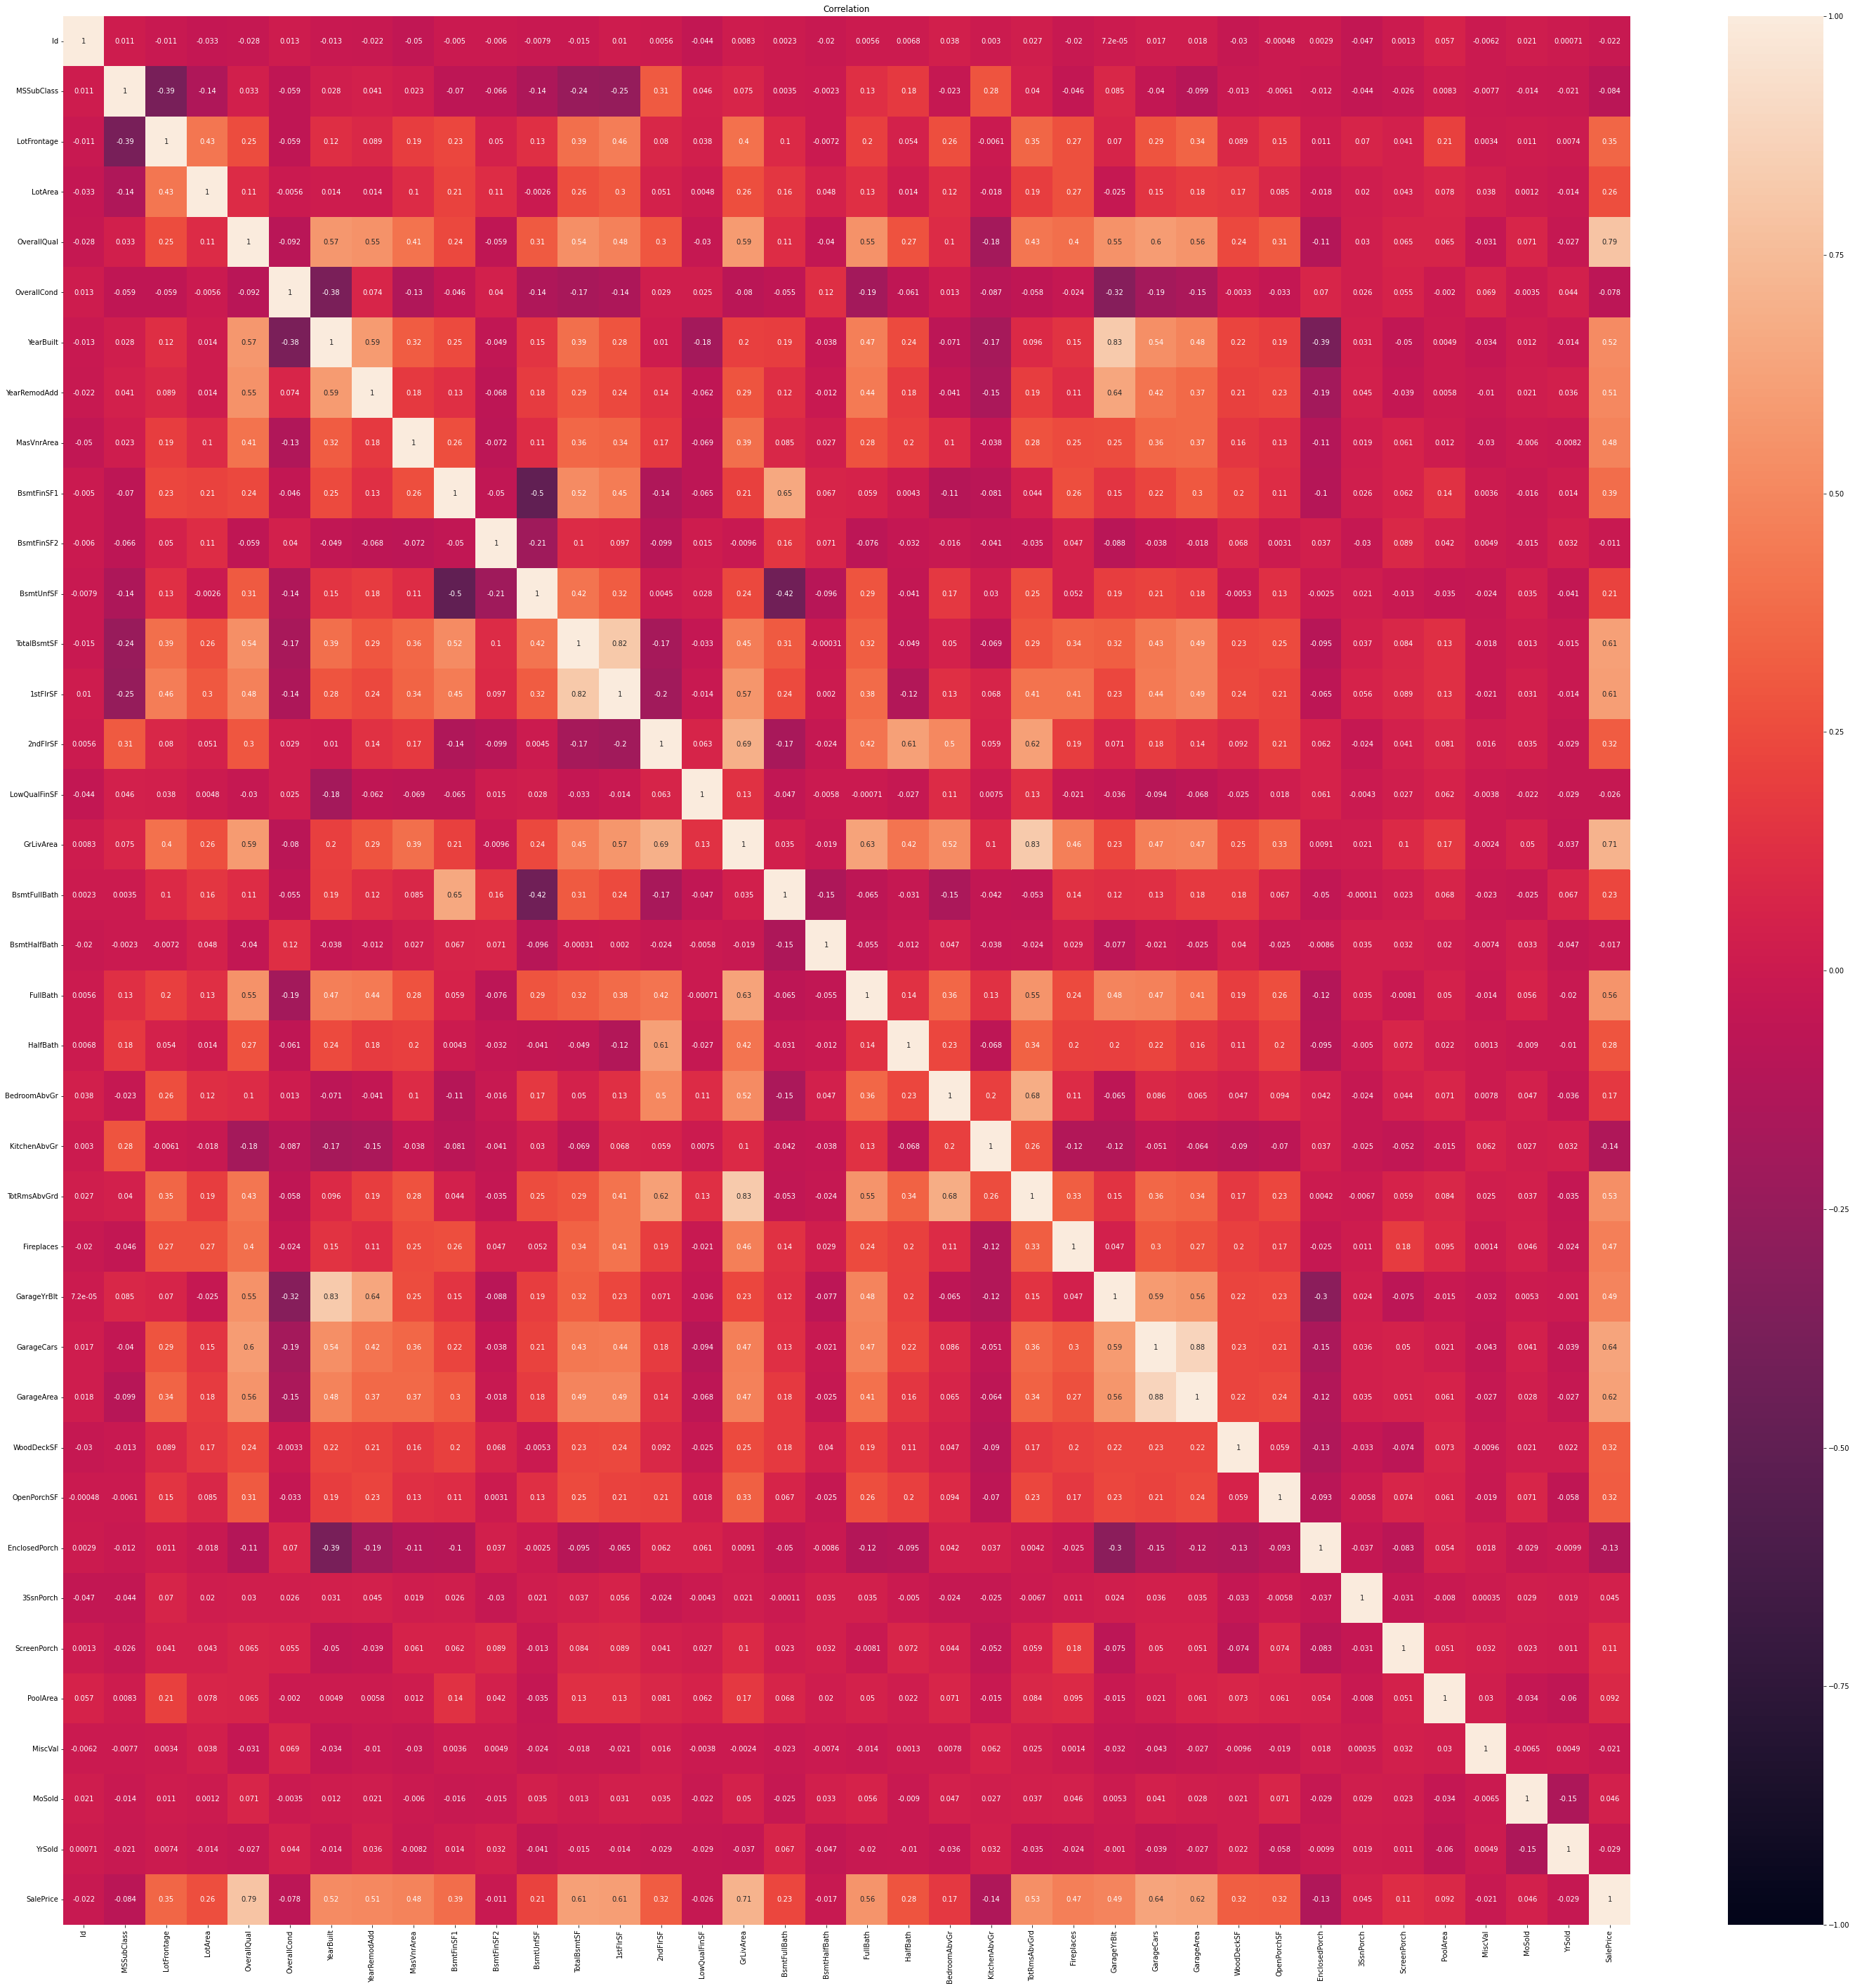

In [ ]:
var_corr = train.corr()
plt.figure(figsize=(50,50))
sns.heatmap(var_corr, vmin=-1, vmax =1, annot=True)
plt.title("Correlation")


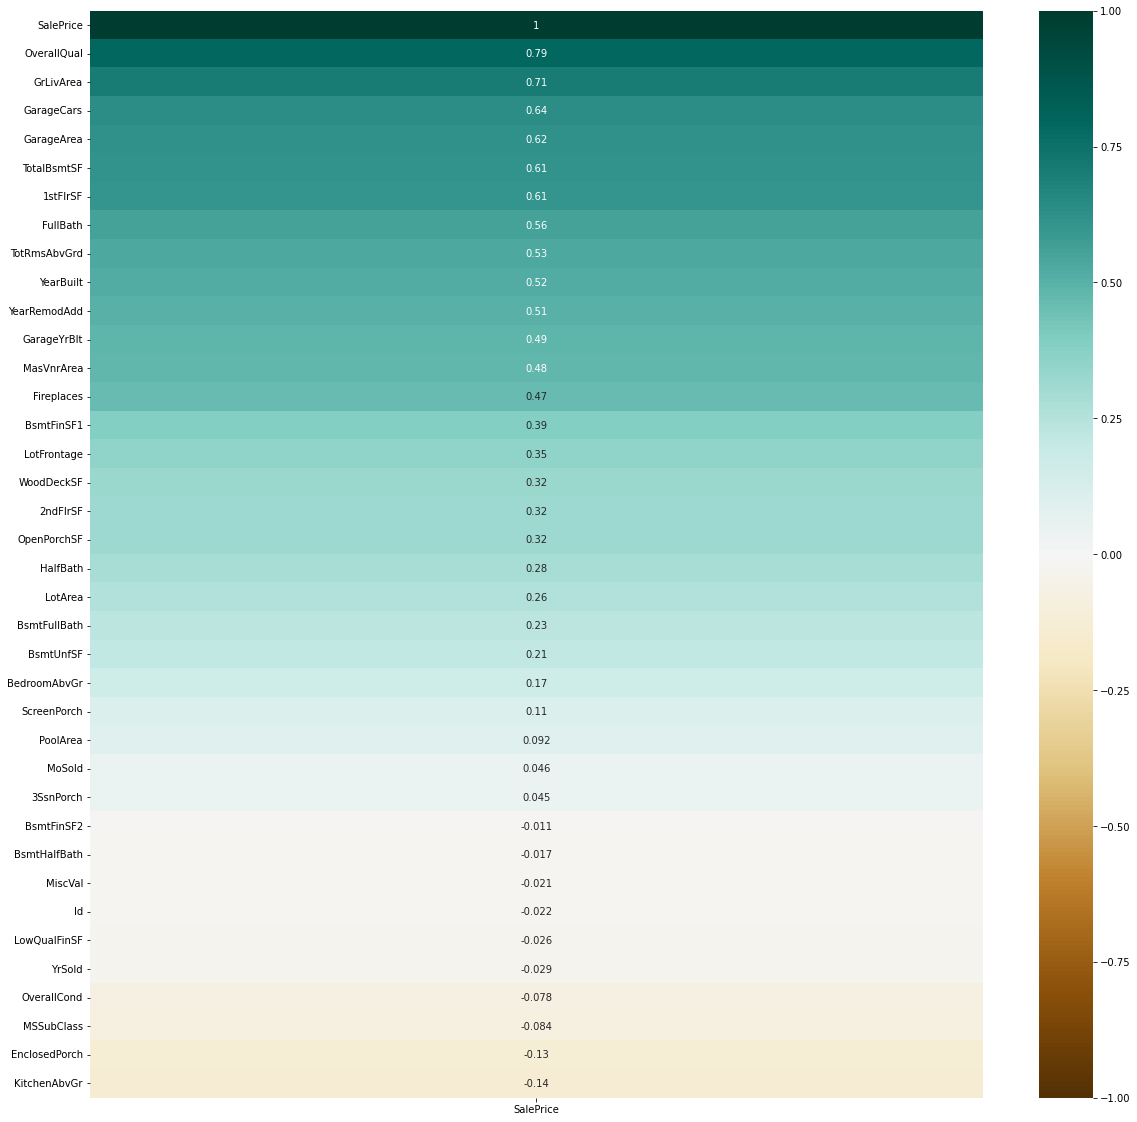

In [ ]:
# Correlation between feature and the label itself
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(var_corr[['SalePrice']].sort_values(
    by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

MSSUbClass almost aprroaces zero correlation

In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
train.loc[0,"MSSubClass"]

60

In [ ]:
train.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [ ]:
train.MSSubClass.dtype

dtype('int64')

In [ ]:
train.MSSubClass

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64

In [ ]:
def analysis(col):
  print(train[col].unique())
  print(train[col].dtype)

In [ ]:
analysis("MSSubClass")

[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
int64


In [ ]:
analysis("MSZoning")

['RL' 'RM' 'C (all)' 'FV' 'RH']
object


In [ ]:
analysis("LotFrontage")

[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
float64


In [ ]:
analysis("Street")

['Pave' 'Grvl']
object


In [ ]:
analysis("LotShape")

['Reg' 'IR1' 'IR2' 'IR3']
object


In [ ]:
analysis("SaleType")

['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
object


In [ ]:
analysis("SaleCondition")

['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
object


**DROP COLUMNS WITH HIGHEST MISSING VALUES**

In [ ]:
for col in train:
    if pd.isnull(train[col]).any():
        print('containing NA values:', col)

containing NA values: LotFrontage
containing NA values: Alley
containing NA values: MasVnrType
containing NA values: MasVnrArea
containing NA values: BsmtQual
containing NA values: BsmtCond
containing NA values: BsmtExposure
containing NA values: BsmtFinType1
containing NA values: BsmtFinType2
containing NA values: Electrical
containing NA values: FireplaceQu
containing NA values: GarageType
containing NA values: GarageYrBlt
containing NA values: GarageFinish
containing NA values: GarageQual
containing NA values: GarageCond
containing NA values: PoolQC
containing NA values: Fence
containing NA values: MiscFeature


In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = train.isnull().sum()/train.isnull().count()*100
percent_rounded = (round(percent, 1)).sort_values(ascending=False)
missing = pd.concat([total, percent_rounded], axis=1, keys=['Total', '%'])
missing.head(20)

,Total,%
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageCond,81,5.5
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5


**before deleting columns carry massive missing values, try to analyze first**

In [ ]:
var = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","GarageCond","GarageType",
       "GarageFinish","GarageQual","BsmtExposure","BsmtFinType2","BsmtFinType1",
       "BsmtCond","BsmtQual"]

for column in var:
  print("It is "+ column)
  analysis(column)

It is PoolQC
[nan 'Ex' 'Fa' 'Gd']
object
It is MiscFeature
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
object
It is Alley
[nan 'Grvl' 'Pave']
object
It is Fence
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
object
It is FireplaceQu
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
object
It is GarageCond
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
object
It is GarageType
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
object
It is GarageFinish
['RFn' 'Unf' 'Fin' nan]
object
It is GarageQual
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
object
It is BsmtExposure
['No' 'Gd' 'Mn' 'Av' nan]
object
It is BsmtFinType2
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
object
It is BsmtFinType1
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
object
It is BsmtCond
['TA' 'Gd' nan 'Fa' 'Po']
object
It is BsmtQual
['Gd' 'TA' 'Ex' nan 'Fa']
object


**From data description, the missing values represent the absence of the property such as no pool, no alley and no fence. Hence, replace these missing values with no (respective properties)**



In [ ]:
train_after_missing = train.copy()

In [ ]:
train_after_missing.shape

(1460, 81)

In [ ]:
fillin_var = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","GarageCond","GarageType",
       "GarageFinish","GarageQual","BsmtExposure","BsmtFinType2","BsmtFinType1",
       "BsmtCond","BsmtQual"]

for var in fillin_var:
  # if var == "PoolQC":
  #   na_name = "NoPool"
  # elif var == "Alley":
  #   na_name ="NoAlley"
  # elif var == "MiscFeature":
  #   na_name ="none"
  # elif var == "Alley":
  #   na_name ="NoAlley"
  # elif var == "Alley":
  #   na_name ="NoAlley"
  # elif var == "Alley":
  #   na_name ="NoAlley"
  # elif var == "Alley":
  #   na_name ="NoAlley"
  # elif var == "Alley":
  #   na_name ="NoAlley"
  # elif var == "Alley":
  #   na_name ="NoAlley"
  # elif var == "Alley":
  #   na_name ="NoAlley"
  # elif var == "Alley":
  #   na_name ="NoAlley"
  # elif var == "Alley":
  #   na_name ="NoAlley"
  # elif var == "Alley":
  #   na_name ="NoAlley"
  # elif var == "Alley":
  #   na_name ="NoAlley"
  # elif var == "Alley":
  #   na_name ="NoAlley"
  # else:
  #   na_name = "NoFence"

  train_after_missing[var] =train_after_missing[var].fillna("none")



In [ ]:
for col in train_after_missing:
    if pd.isnull(train_after_missing[col]).any():
        print('containing NA values:', col)

containing NA values: LotFrontage
containing NA values: MasVnrType
containing NA values: MasVnrArea
containing NA values: Electrical
containing NA values: GarageYrBlt


In [ ]:
total = train_after_missing.isnull().sum().sort_values(ascending=False)
percent = train_after_missing.isnull().sum()/train_after_missing.isnull().count()*100
percent_rounded = (round(percent, 1)).sort_values(ascending=False)
missing = pd.concat([total, percent_rounded], axis=1, keys=['Total', '%'])
missing.head(20)

,Total,%
LotFrontage,259,17.7
GarageYrBlt,81,5.5
MasVnrType,8,0.5
MasVnrArea,8,0.5
Electrical,1,0.1
SalePrice,0,0.0
ExterCond,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0


In [ ]:
analysis("GarageYrBlt")

[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]
float64
